In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1.  Section

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Loading the training dataset of house price.
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [5]:
# Loading the testing dataset of house price.
df_testing = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Open the file in read mode
f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")

# Read the entire content of the file and print it
print(f.read())

# Close the file after reading
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
# for i in range(len(df.columns)-1):
#     print(df.iloc[:, i].describe())


# 2. Section

In [10]:
# removing the id 
df = df.drop('Id', axis = 1)


In [11]:
# first lets check for datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
def separate_columns_by_dtype(df):
    int_columns = df.select_dtypes(include=['int64']).columns.tolist()
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int_columns, float_columns, object_columns

In [13]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [14]:
def check_null(df, title):
    # Map NULL (NaN) values to 0 and non-null values to 1
    result_filled = df.apply(lambda col: col.map(lambda x: 0 if pd.isna(x) else 1))
    
    # Count the number of NULL (0) and non-null (1) in each feature
    counts = pd.DataFrame({
        'NULL': (result_filled == 0).sum(),
        'NON-NULL': (result_filled == 1).sum()
    })

    # Set a color palette
    sns.set_palette(['#ff9999', '#66b3ff'])  # Red for NULL and Blue for NON-NULL
    
    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette())

    # Set plot title and labels
    plt.title(f'Count of NULL and NON-NULL Entries in the Dataset of {title}',)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10,)

    # Adding counters at the top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fontsize=9, color='black')

    # Set plot layout to avoid overlap
    plt.tight_layout()

    # Customize legend
    legend = plt.legend(loc='upper right')
    legend.get_texts()[0].set_text('NULL')
    legend.get_texts()[1].set_text('NON-NULL')

    # Show the plot
    plt.show()

In [15]:
# now lets explore the each features and try to remove null values 

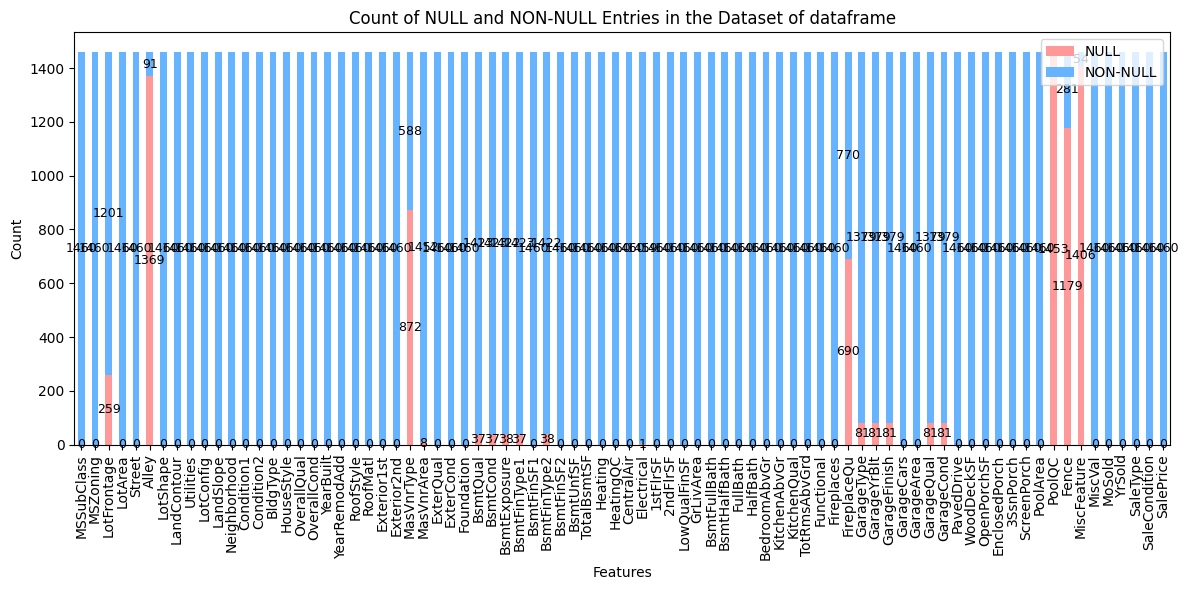

In [16]:
check_null(df, 'dataframe')

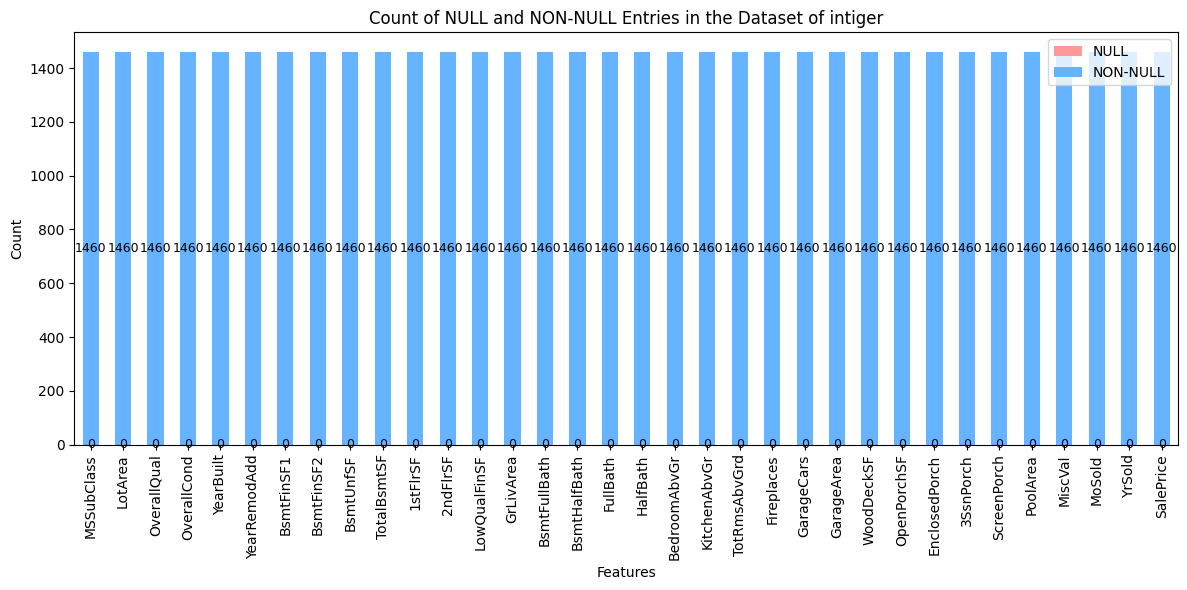

In [17]:
check_null(df[int_columns], 'intiger')

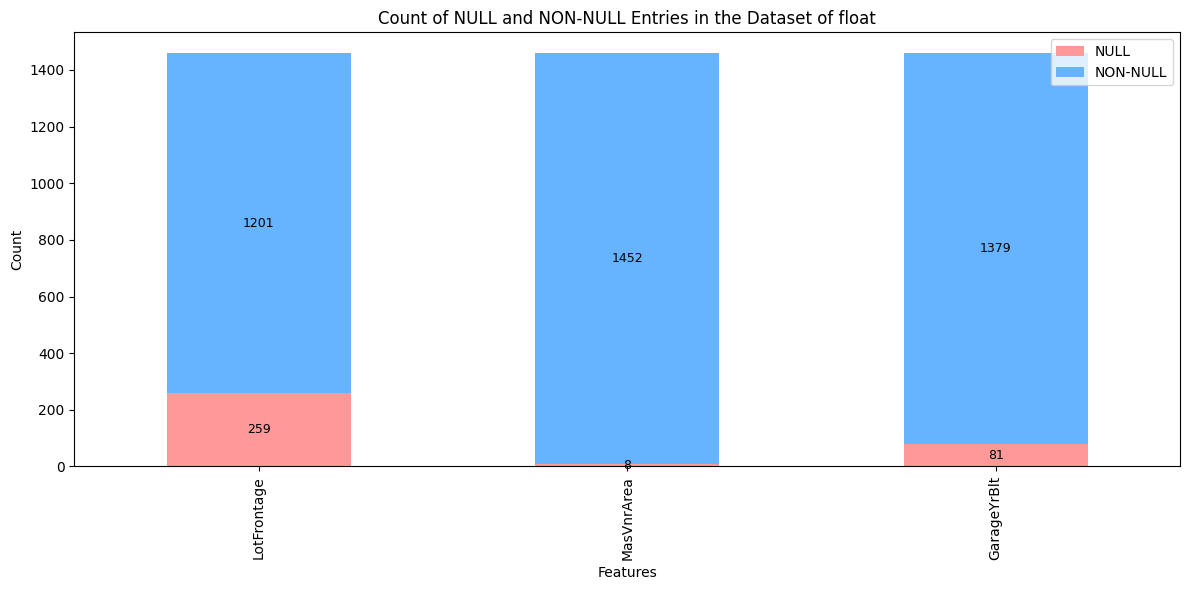

In [18]:
check_null(df[float_columns], 'float')

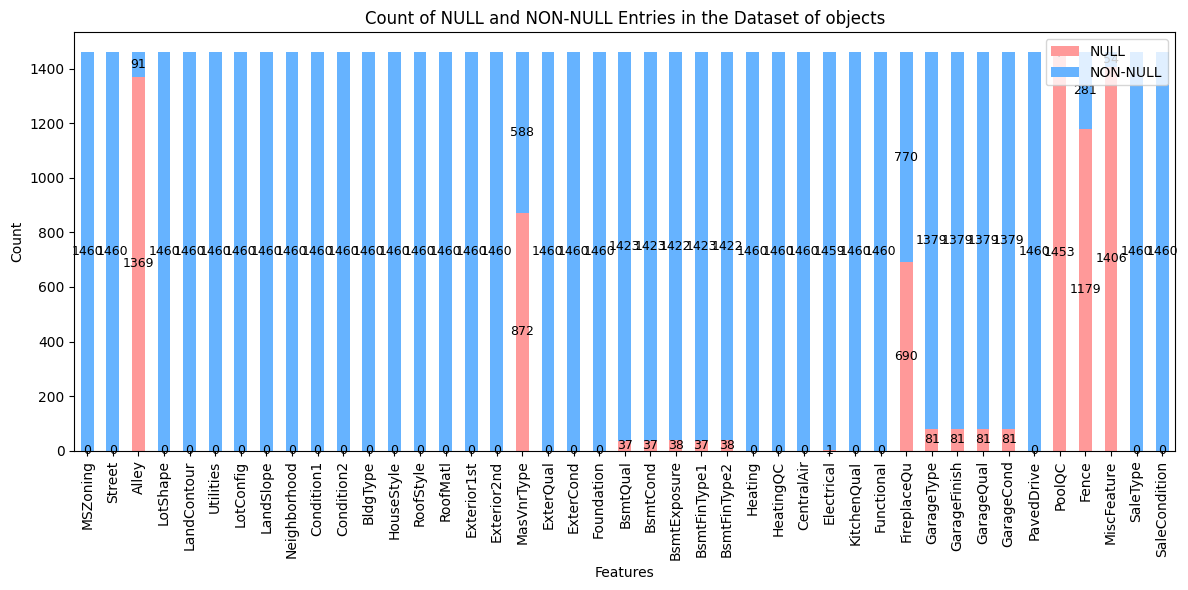

In [19]:
check_null(df[object_columns], 'objects')

In [20]:
### lets remove null and explore the numerical features 
df[int_columns].isnull().sum()
# there is no any nullentries in the datatype integer

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
def distribution_plot(df, feature):
    # Set plot style
    # sns.set(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(5, 3), dpi=200)
    sns.histplot(df[feature], kde=True, color='teal', edgecolor='black', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10,  color='darkblue')
    plt.xlabel(f'Range {feature}', fontsize=10, color='darkgreen')
    plt.ylabel('Frequency', fontsize=10, color='darkgreen')
    
    # Customize grid appearance
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Add a background color
    plt.gca().set_facecolor('whitesmoke')
    
    # Customize axis ticks
    plt.xticks(fontsize=10, color='darkred')
    plt.yticks(fontsize=10, color='darkred')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [22]:
def fea_info(df, feature):
    # Comment: Print the count of null values in the feature
    print(f"Count of NULL values in '{feature}': {df[feature].isnull().sum()}")
    
    # Comment: Print information about the data type and non-null counts of the feature
    print(f"\nInfo for '{feature}':")
    print(df[feature].info())
    
    # Comment: Print the descriptive statistics for the feature
    print(f"\nDescriptive Statistics for '{feature}':")
    print(df[feature].describe())

In [23]:
fea_info(df, 'LotFrontage')

Count of NULL values in 'LotFrontage': 259

Info for 'LotFrontage':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'LotFrontage':
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


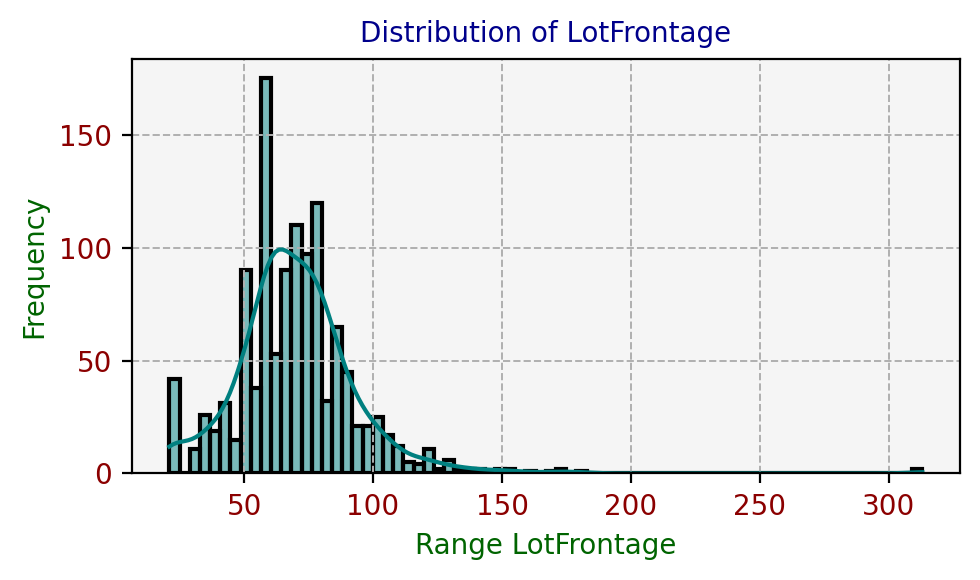

In [24]:
distribution_plot(df, 'LotFrontage')

In [25]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


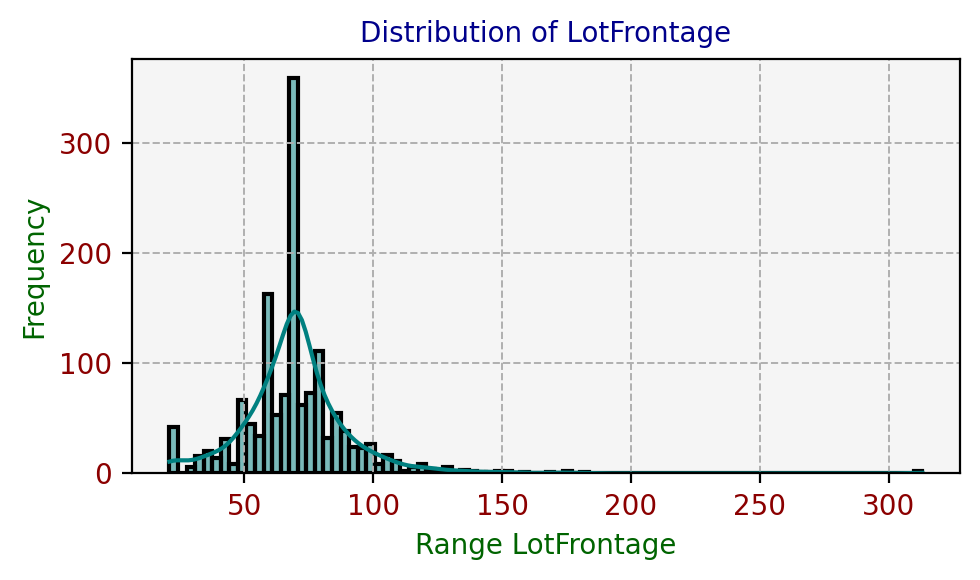

In [26]:
distribution_plot(df, 'LotFrontage')

In [27]:
fea_info(df, 'MasVnrArea')

Count of NULL values in 'MasVnrArea': 8

Info for 'MasVnrArea':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'MasVnrArea':
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


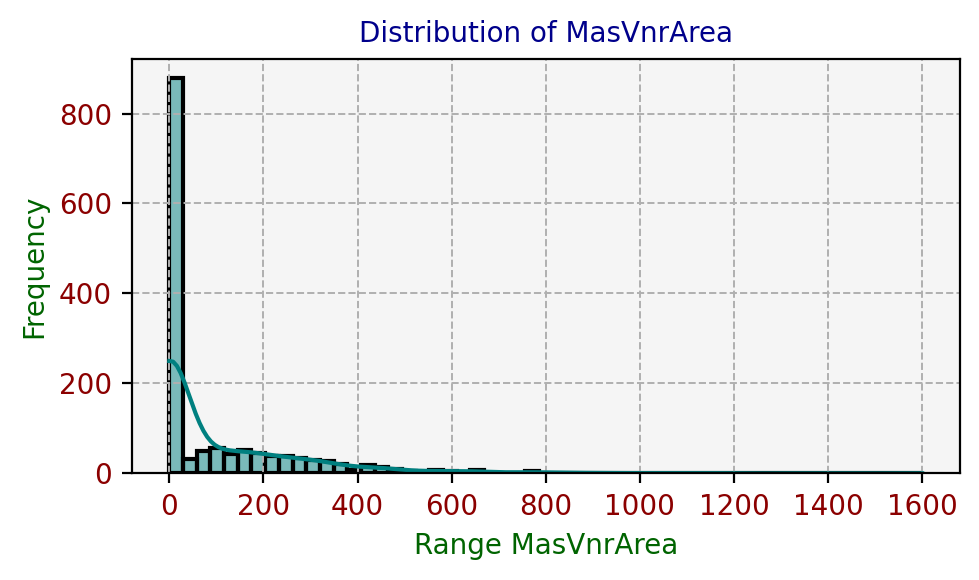

In [28]:
distribution_plot(df, 'MasVnrArea')



In [29]:
fea_info(df, 'MasVnrArea')

Count of NULL values in 'MasVnrArea': 8

Info for 'MasVnrArea':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'MasVnrArea':
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [30]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

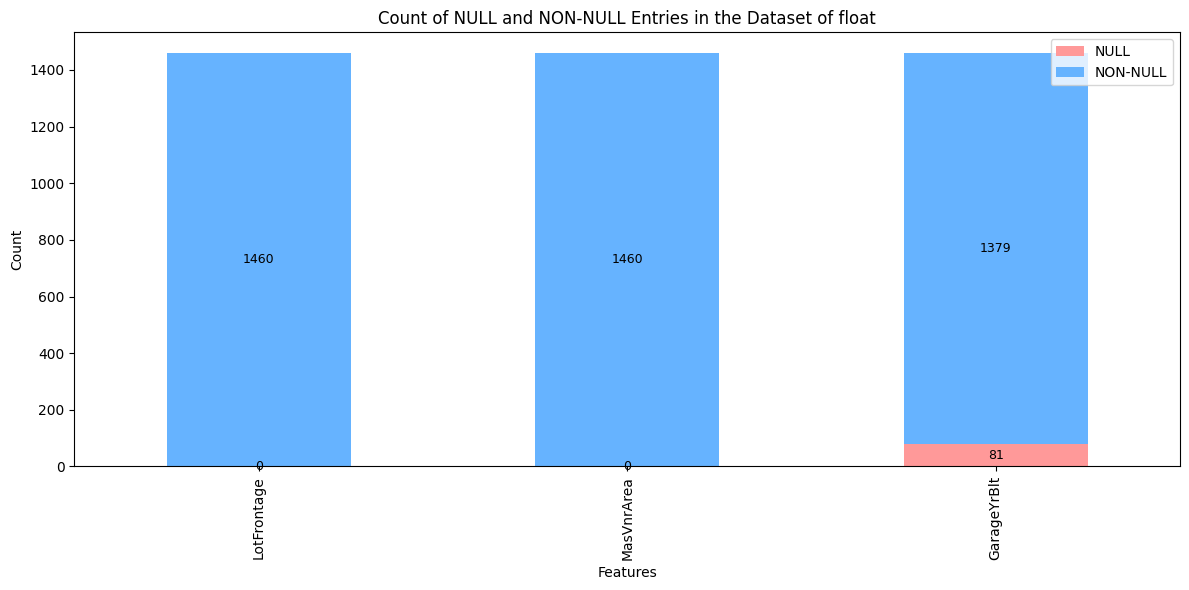

In [31]:
check_null(df[float_columns], 'float')

In [32]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

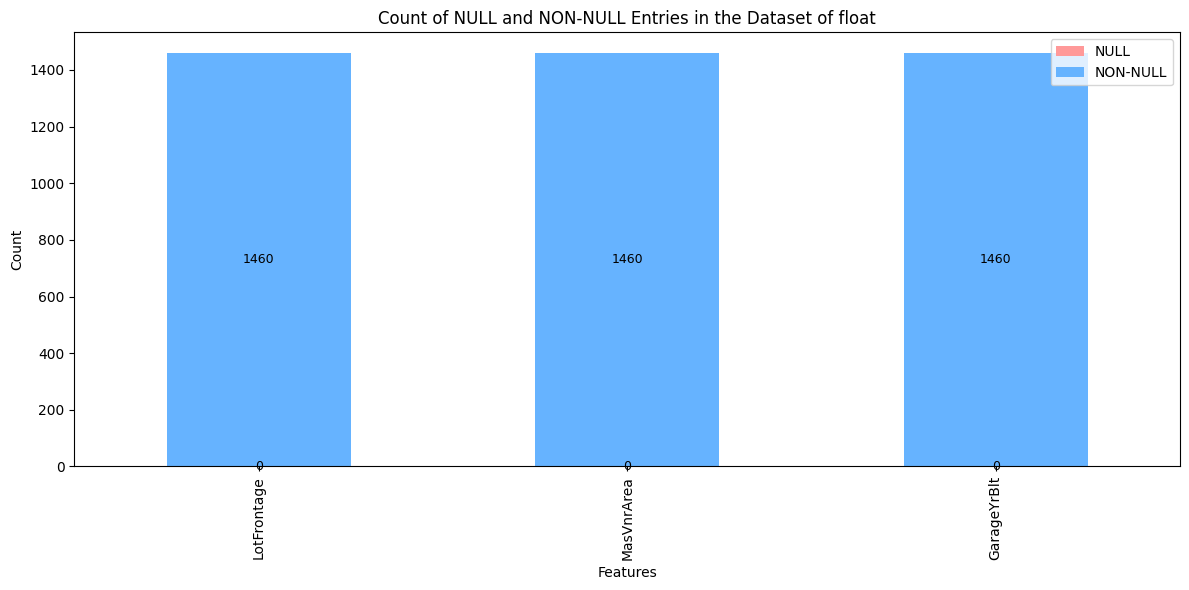

In [33]:
check_null(df[float_columns], 'float')

In [34]:
# LETS EXPLORE AND REMOVE NULL VALUES AND REPLACE WITH APPROPRATE MEANINGS

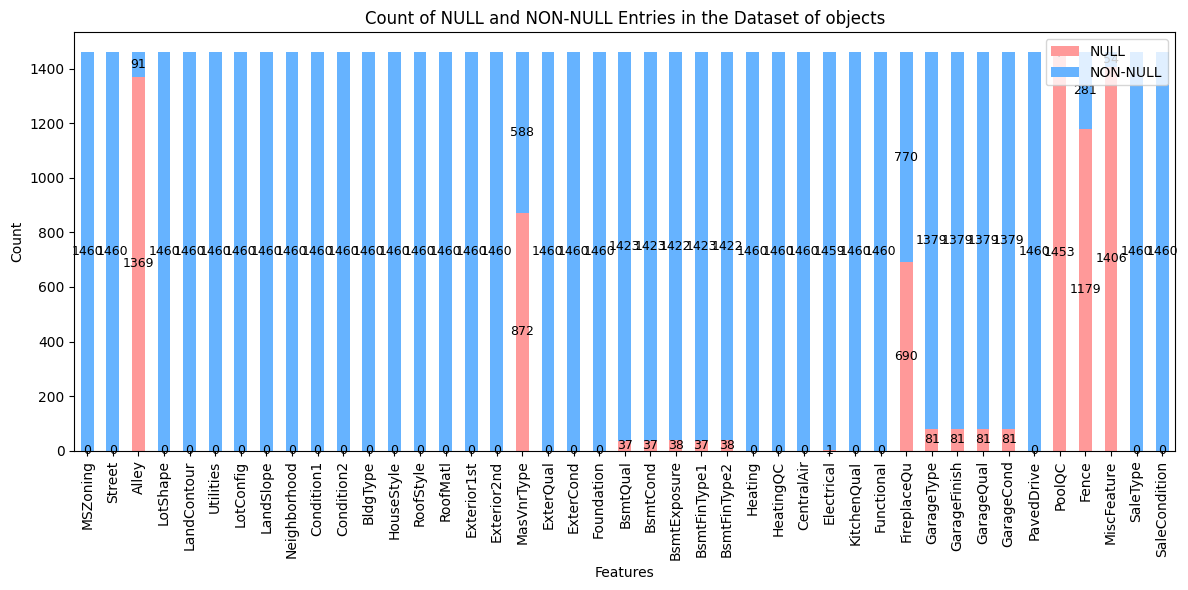

In [35]:
check_null(df[object_columns], 'objects')

In [36]:
df['Alley'].unique()
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access

array([nan, 'Grvl', 'Pave'], dtype=object)

In [37]:
# Define the mapping dictionary
dic = { 'Grvl': 'Gravel', 'Pave': 'Paved' }
df['Alley'] = df['Alley'].fillna('No Alley')

# Replace values based on the dictionary
df['Alley'] = df['Alley'].replace(dic)

df['Alley'].unique()

array(['No Alley', 'Gravel', 'Paved'], dtype=object)

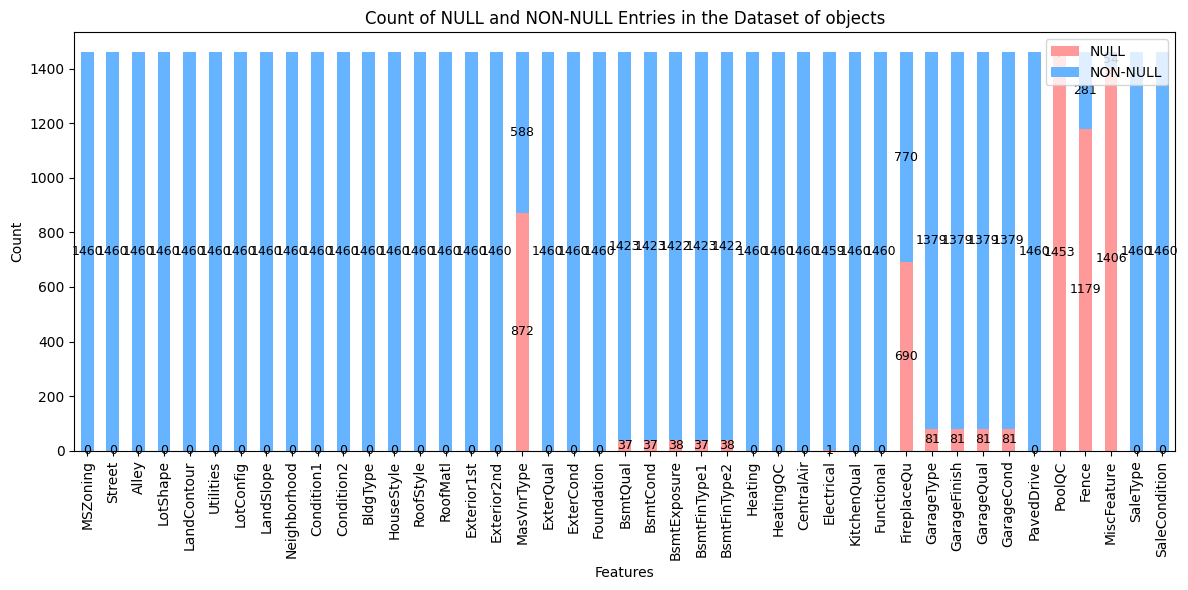

In [38]:
check_null(df[object_columns], 'objects')

In [39]:
df['MasVnrType'].unique()
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [40]:
# Define the mapping dictionary
dic = { 'BrkCmn': 'Brick Common', 'BrkFace': 'Brick Face', 'CBlock':'Cinder Block' }

df['MasVnrType'] = df['MasVnrType'].fillna('None')
# Replace values based on the dictionary
df['MasVnrType'] = df['MasVnrType'].replace(dic)

df['MasVnrType'].unique()

array(['Brick Face', 'None', 'Stone', 'Brick Common'], dtype=object)

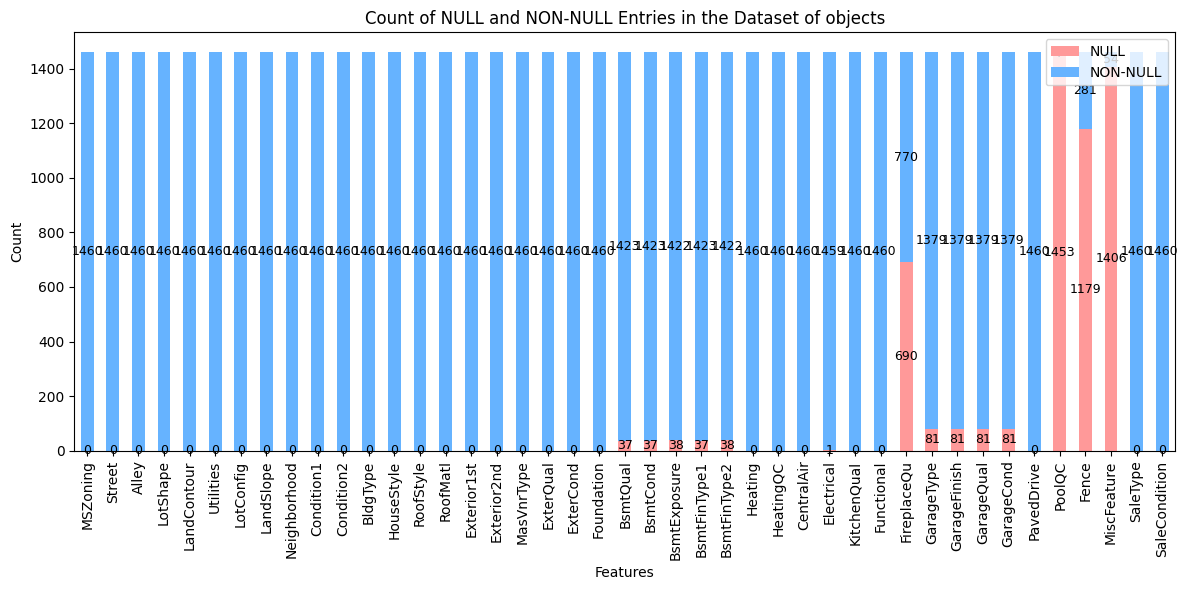

In [41]:
check_null(df[object_columns], 'objects')

In [42]:
df['BsmtQual'].unique()
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [43]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtQual'] = df['BsmtQual'].replace(dic)

df['BsmtQual'].unique()

array(['Good', 'Typical', 'Excellent', 'No Basement', 'Fair'],
      dtype=object)

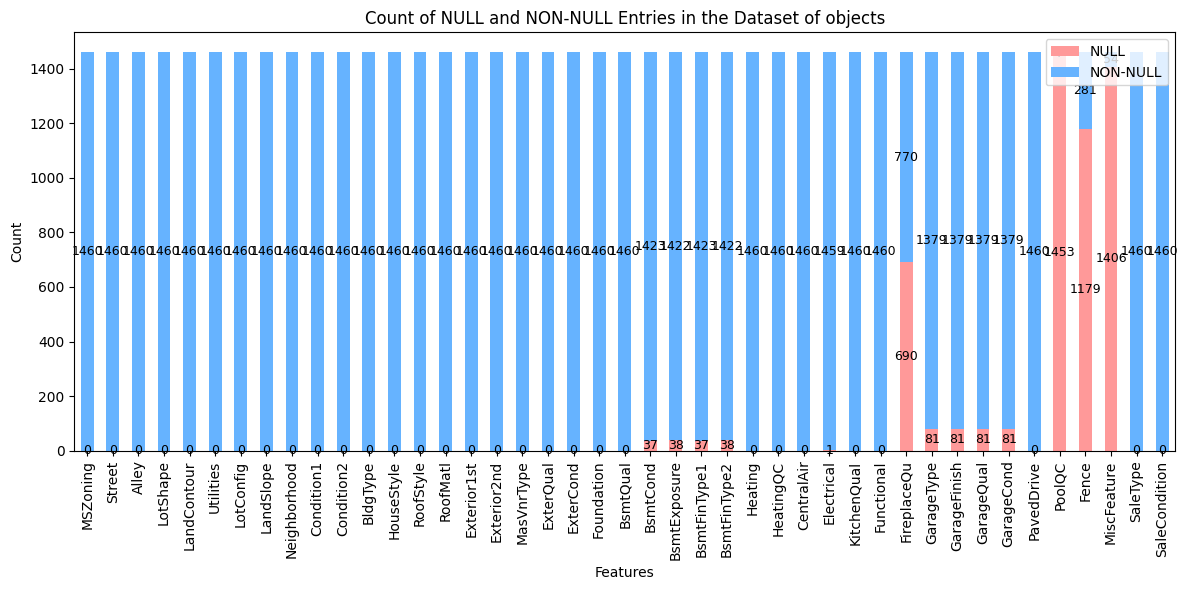

In [44]:
check_null(df[object_columns], 'objects')

In [45]:
df['BsmtCond'].unique()
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [46]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'TA':'Typical', 'Fa':'Fair', 'Po': 'Poor', 'Gd' : 'Good' }
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtCond'] = df['BsmtCond'].replace(dic)

df['BsmtCond'].unique()

array(['Typical', 'Good', 'No Basement', 'Fair', 'Poor'], dtype=object)

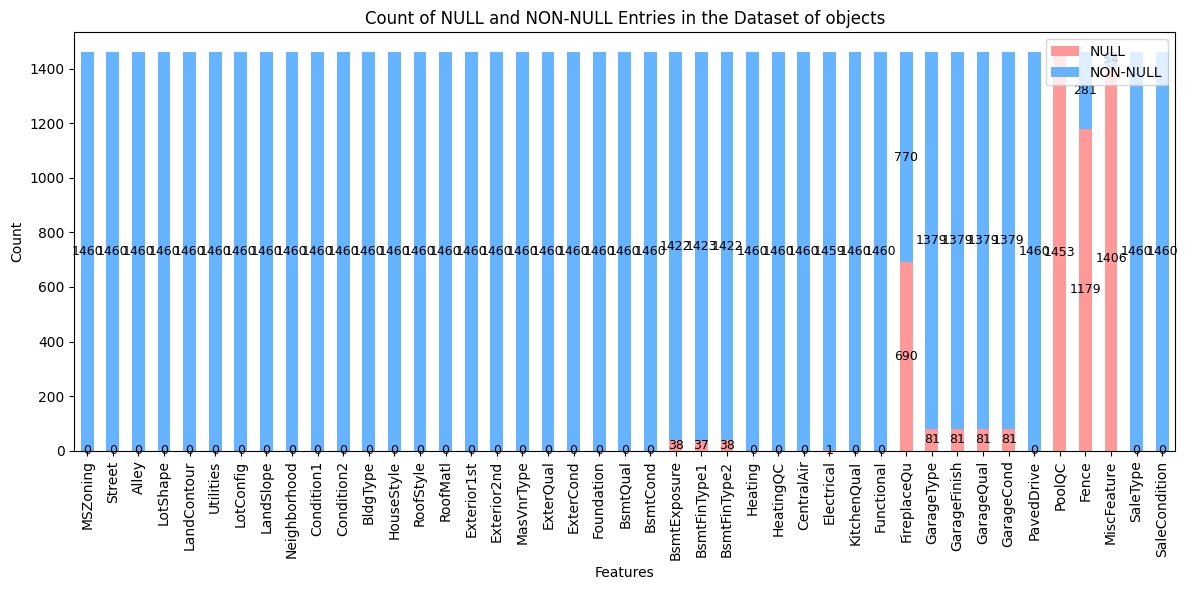

In [47]:
check_null(df[object_columns], 'objects')

In [48]:
df['BsmtExposure'].unique()
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [49]:
# Define the mapping dictionary
dic = { 'Av': 'Average Exposure', 'Mn':'Mimimum Exposure','Gd' : 'Good Exposure', 'No':'No Exposure' }
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Exposure')

# Replace values based on the dictionary
df['BsmtExposure'] = df['BsmtExposure'].replace(dic)

df['BsmtExposure'].unique()

array(['No Exposure', 'Good Exposure', 'Mimimum Exposure',
       'Average Exposure'], dtype=object)

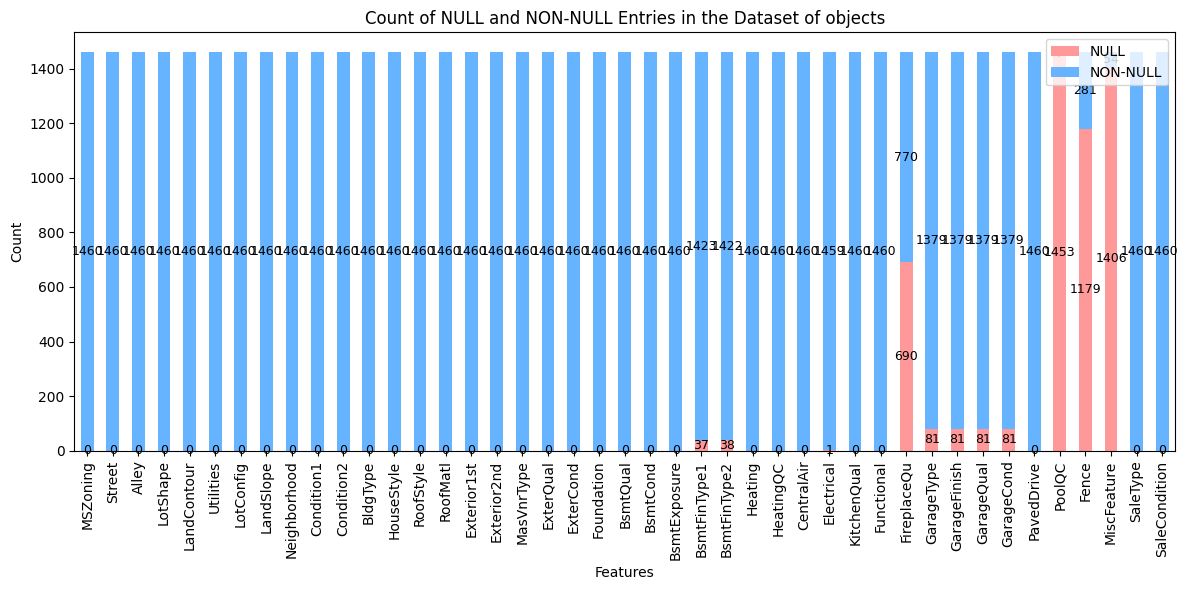

In [50]:
check_null(df[object_columns], 'objects')

In [51]:
df['BsmtFinType1'].unique()
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [52]:

# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType1'] = df['BsmtFinType1'].replace(dic)

df['BsmtFinType1'].unique()

array(['Good Living Quarters', 'Average Living Quarters', 'Unfinshed',
       'Average Rec Room', 'Below Average Living Quarters', 'No Basement',
       'Low Quality'], dtype=object)

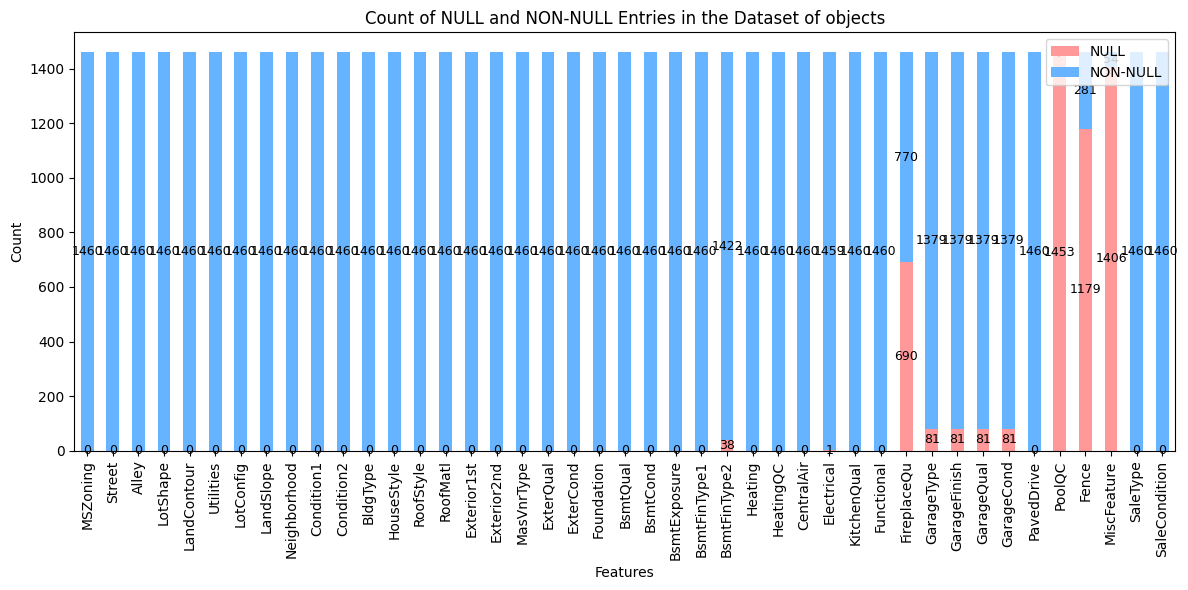

In [53]:
check_null(df[object_columns], 'objects')

In [54]:
df['BsmtFinType2'].unique()
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [55]:
# Define the mapping dictionary
dic = { 'GLQ': 'Good Living Quarters', 'ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters',  'Rec':'Average Rec Room',  'LwQ':'Low Quality', 'Unf':'Unfinshed',}
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')

# Replace values based on the dictionary
df['BsmtFinType2'] = df['BsmtFinType2'].replace(dic)

df['BsmtFinType2'].unique()

array(['Unfinshed', 'Below Average Living Quarters', 'No Basement',
       'Average Living Quarters', 'Average Rec Room', 'Low Quality',
       'Good Living Quarters'], dtype=object)

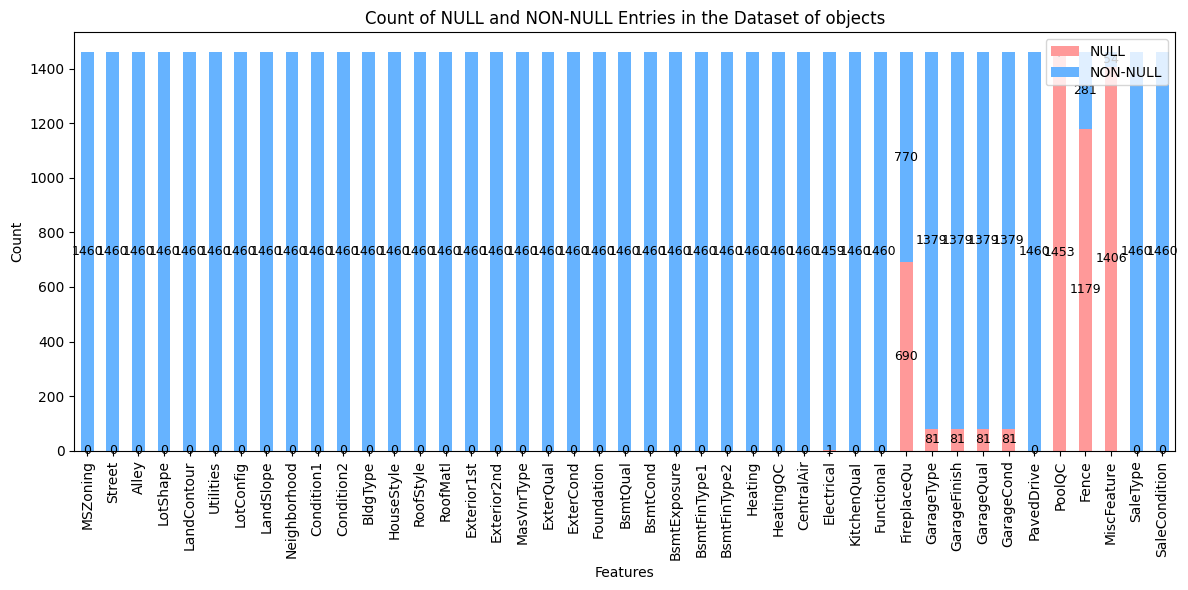

In [56]:
check_null(df[object_columns], 'objects')

In [57]:
df['FireplaceQu'].unique()
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [58]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

# Replace values based on the dictionary
df['FireplaceQu'] = df['FireplaceQu'].replace(dic)

df['FireplaceQu'].unique()

array(['No Fireplace', ' Average', 'Good', 'Fair', 'Excellent', 'Poor'],
      dtype=object)

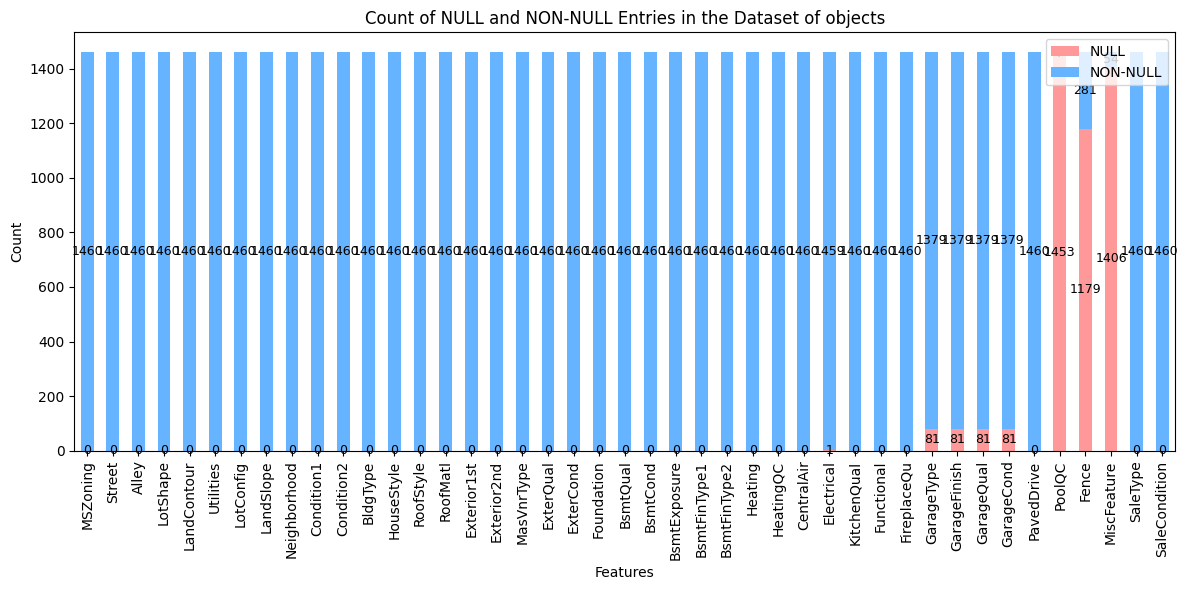

In [59]:
check_null(df[object_columns], 'objects')


In [60]:
df['GarageType'].unique()
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [61]:
# Define the mapping dictionary
dic = { 'Attchd' :	'Attached to home','Basment': 'Basment Garage', 'BuiltIn':'Built-In',  'CarPort':'Car Port',  'Detchd':'Detached from home'}
df['GarageType'] = df['GarageType'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageType'] = df['GarageType'].replace(dic)

df['GarageType'].unique()

array(['Attached to home', 'Detached from home', 'Built-In', 'Car Port',
       'No Garage', 'Basment Garage', '2Types'], dtype=object)

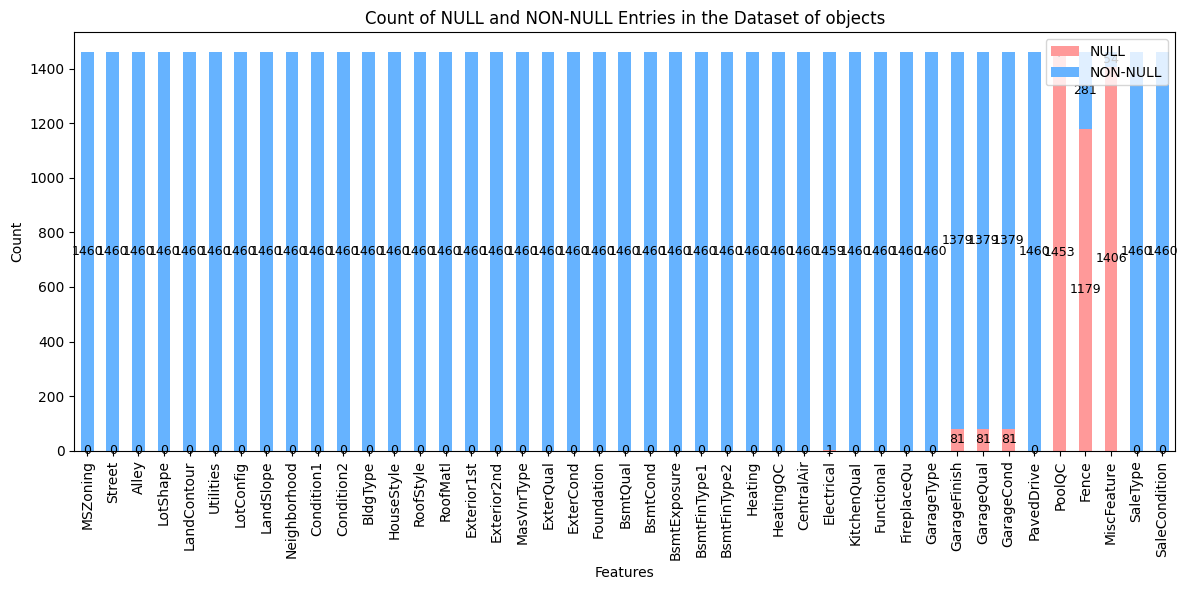

In [62]:
check_null(df[object_columns], 'objects')

In [63]:
df['GarageFinish'].unique()
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [64]:
# Define the mapping dictionary
dic = { 'Fin' :	'Finished','RFn': 'Rough Finished', 'Unf':'Unfinished'}
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageFinish'] = df['GarageFinish'].replace(dic)

df['GarageFinish'].unique()

array(['Rough Finished', 'Unfinished', 'Finished', 'No Garage'],
      dtype=object)

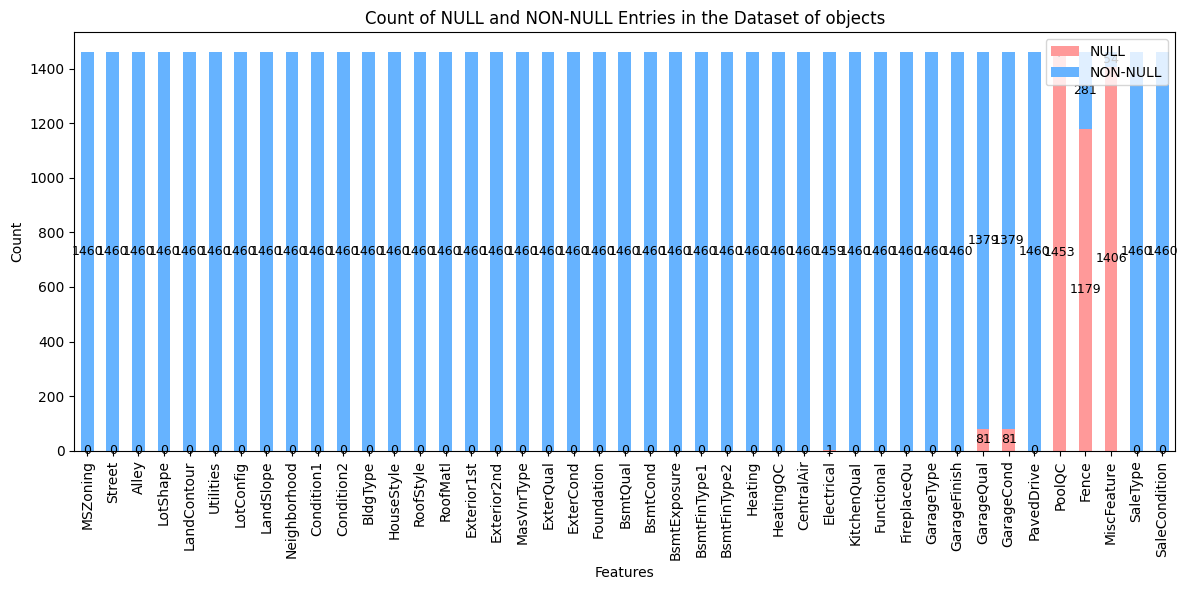

In [65]:
check_null(df[object_columns], 'objects')

In [66]:
df['GarageQual'].unique()
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [67]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageQual'] = df['GarageQual'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageQual'] = df['GarageQual'].replace(dic)

df['GarageQual'].unique()

array([' Average', 'Fair', 'Good', 'No Garage', 'Excellent', 'Poor'],
      dtype=object)

In [68]:
df['GarageCond'].unique()
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [69]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair',  'Po':'Poor'}
df['GarageCond'] = df['GarageCond'].fillna('No Garage')

# Replace values based on the dictionary
df['GarageCond'] = df['GarageCond'].replace(dic)

df['GarageCond'].unique()

array([' Average', 'Fair', 'No Garage', 'Good', 'Poor', 'Excellent'],
      dtype=object)

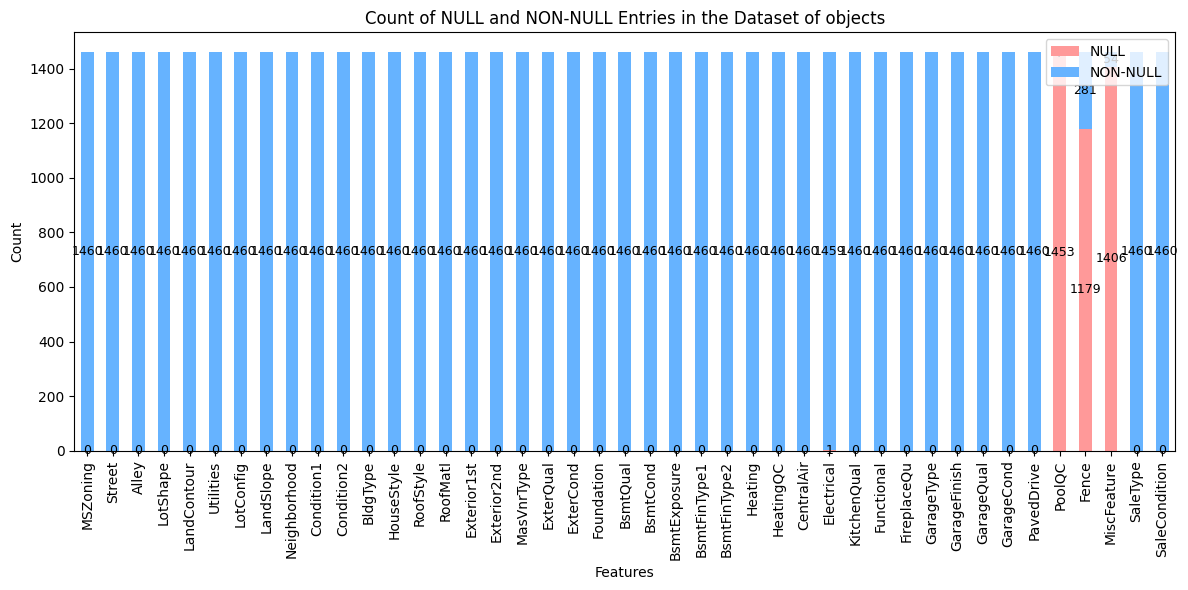

In [70]:
check_null(df[object_columns], 'objects')

In [71]:
df['PoolQC'].unique()
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [72]:
# Define the mapping dictionary
dic = { 'Ex': 'Excellent', 'Gd':'Good','TA':' Average',  'Fa':'Fair'}
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

# Replace values based on the dictionary
df['PoolQC'] = df['PoolQC'].replace(dic)

df['PoolQC'].unique()

array(['No Pool', 'Excellent', 'Fair', 'Good'], dtype=object)

In [73]:
df['Fence'].unique()
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [74]:
# Define the mapping dictionary
dic = { 'GdPrv': 'Good Privacy', 'MnPrv':'Minimum Privacy','GdWo':' Good Wood',  'MnWw':'Minimum Wood/Wire'}
df['Fence'] = df['Fence'].fillna('No Fence')

# Replace values based on the dictionary
df['Fence'] = df['Fence'].replace(dic)

df['Fence'].unique()

array(['No Fence', 'Minimum Privacy', ' Good Wood', 'Good Privacy',
       'Minimum Wood/Wire'], dtype=object)

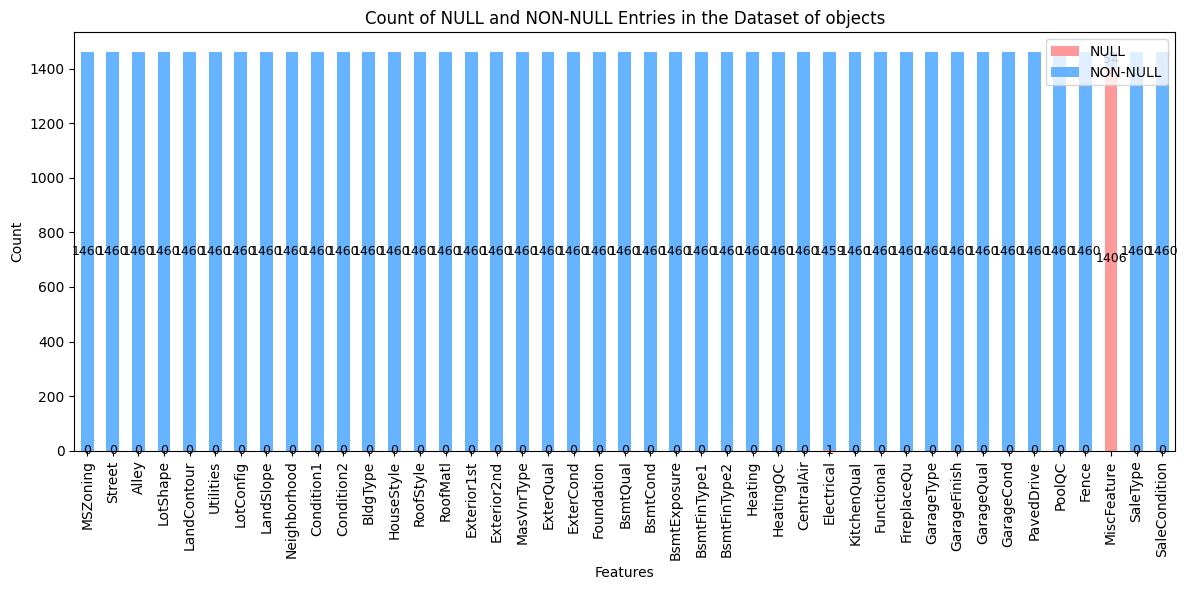

In [75]:
check_null(df[object_columns], 'objects')

In [76]:
df['MiscFeature'].unique()
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [77]:
# Define the mapping dictionary
dic = { 'Elev': 'Elevator', 'Gar2':'2nd Garage','Othr':' Other',  'Shed':'Shed', 'TenC':'Tennis Court'}
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Replace values based on the dictionary
df['MiscFeature'] = df['MiscFeature'].replace(dic)

df['MiscFeature'].unique()

array(['None', 'Shed', '2nd Garage', ' Other', 'Tennis Court'],
      dtype=object)

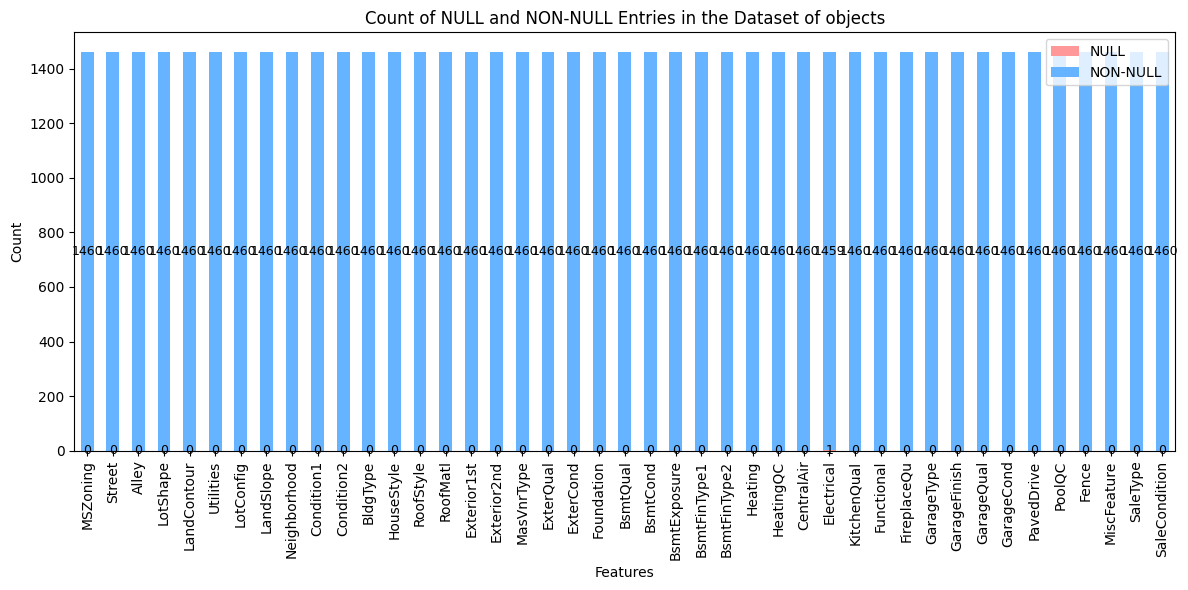

In [78]:
check_null(df[object_columns], 'objects')


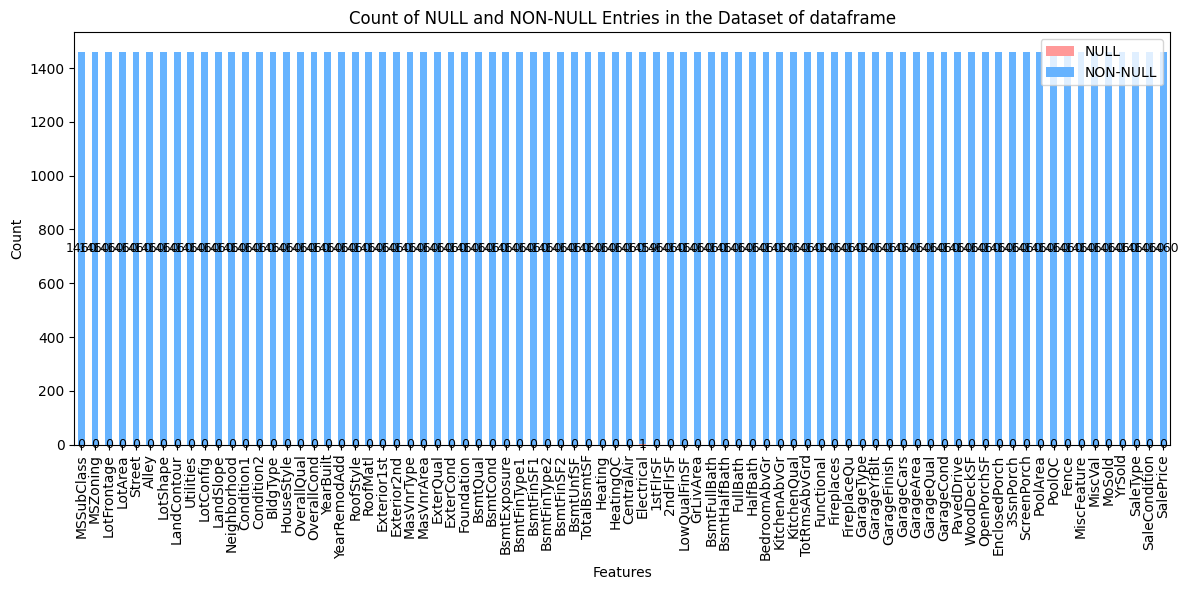

In [79]:
check_null(df, 'dataframe')


In [80]:
df = df.dropna(axis = 0)

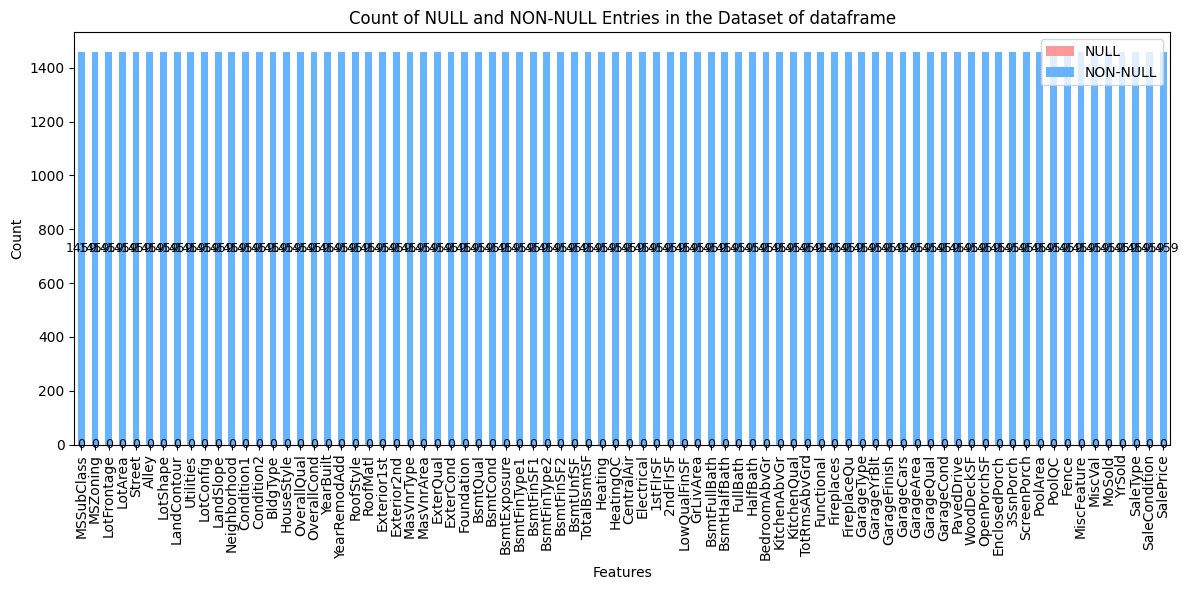

In [81]:
check_null(df, 'dataframe')

In [82]:
df.isnull().sum().sum()

0

# 3. Section  

In [83]:
# Feature Engineering 

In [84]:
# Categorical data handeling

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [ ]:
trn_df = pd.get_dummies(df)

# 3. section
# Exploratory data analysis

In [ ]:
sns.heatmap(trn_df.corr())

In [88]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 302 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(265), float64(3), int64(34)
memory usage: 810.7 KB


In [89]:
# train test split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Split the DataFrame into features (X) and target (y)
X = trn_df.drop(['SalePrice'], axis=1)  # Drop the target column to create features
y = trn_df['SalePrice']                   # Target variable

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()


In [93]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [94]:
# feature importance with random forest


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
feat_labels = trn_df.columns[:-1]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [97]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) LotArea                        0.027289
 2) GrLivArea                      0.027252
 3) 1stFlrSF                       0.026441
 4) BsmtUnfSF                      0.025885
 5) TotalBsmtSF                    0.025867
 6) GarageArea                     0.025411
 7) LotFrontage                    0.023993
 8) YearBuilt                      0.022877
 9) MoSold                         0.022647
10) GarageYrBlt                    0.022376
11) BsmtFinSF1                     0.021905
12) YearRemodAdd                   0.021051
13) OpenPorchSF                    0.018464
14) WoodDeckSF                     0.017812
15) YrSold                         0.017333
16) TotRmsAbvGrd                   0.016612
17) MasVnrArea                     0.016291
18) 2ndFlrSF                       0.015013
19) OverallQual                    0.013839
20) OverallCond                    0.011001
21) MSSubClass                     0.010646
22) BedroomAbvGr                   0.010542
23) Fireplaces                  

<BarContainer object of 301 artists>

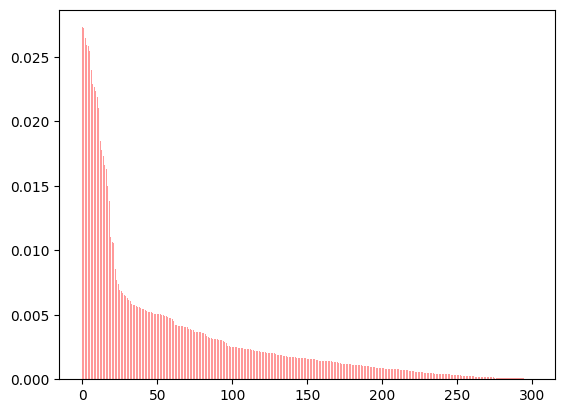

In [98]:
plt.bar(range(X_train.shape[1]), importances[indices], align ='center')

In [99]:
importance_df = pd.DataFrame({
    'Feature': np.array(feat_labels)[indices],
    'Importance': importances[indices]
})

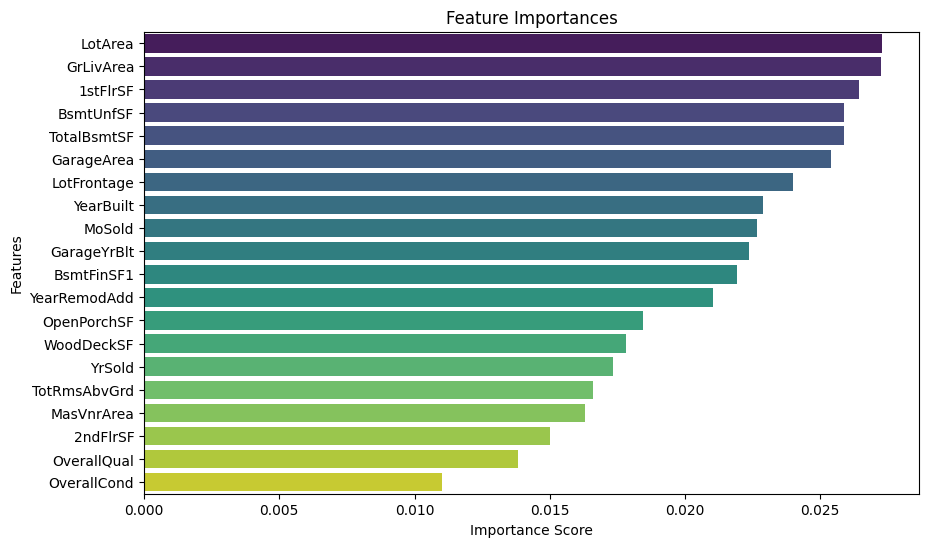

In [100]:
# top 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

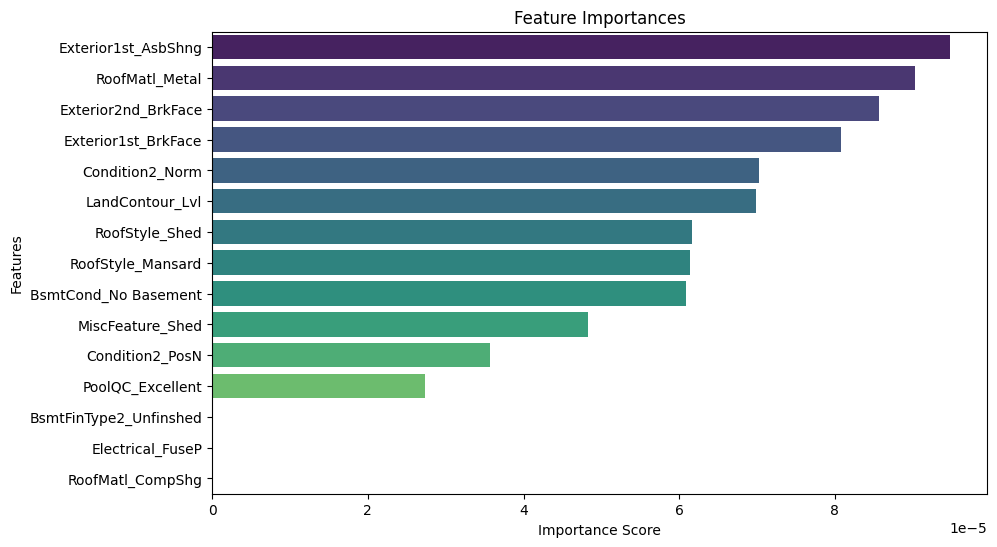

In [101]:
# bottom 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.tail(15), palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [102]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Create and fit the Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=max_features,
                                   random_state=42)
    
    model.fit(X_train_std, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_std)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and their corresponding MSE
print("Best hyperparameters: ", study.best_params)
print("Best MSE: ", study.best_value)

[I 2024-10-22 14:34:31,017] A new study created in memory with name: no-name-fbd4aba3-ffbd-4c41-b2b9-46a9f4940de2
[I 2024-10-22 14:34:31,179] Trial 0 finished with value: 887462568.2205603 and parameters: {'n_estimators': 70, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 887462568.2205603.
[I 2024-10-22 14:34:31,408] Trial 1 finished with value: 1371888345.649948 and parameters: {'n_estimators': 128, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 0 with value: 887462568.2205603.
[I 2024-10-22 14:34:31,436] Trial 2 finished with value: 2083055938.2021744 and parameters: {'n_estimators': 14, 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 887462568.2205603.
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 an

Best hyperparameters:  {'n_estimators': 120, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}
Best MSE:  577718762.6190891
